# Support Vector Machines 

In [53]:
# used for manipulating directory paths
import os
# Scientific and vector computation for python
import numpy as np
# Plotting library
from matplotlib import pyplot 
# Optimization module in scipy
from scipy import optimize
from sklearn import svm
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [54]:
# Load from ex6data1
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:, 0]


In [55]:
def plotData(X, y, grid=False):
    """
    Plots the data points X and y into a new figure. Uses `+` for positive examples, and `o` for
    negative examples. `X` is assumed to be a Mx2 matrix
    """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'X', mew=1, ms=10, mec='k')
    pyplot.plot(X[neg, 0], X[neg, 1], 'o', mew=1, mfc='y', ms=10, mec='k')
    pyplot.grid(grid)


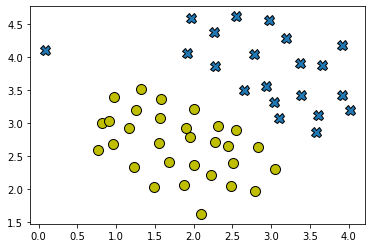

In [56]:
plotData(X, y)

In [57]:
#C is large, overfit. C is small, fits perfectly
clf = svm.SVC(kernel='linear',C = 1) 
# fitting x samples and y classes 
clf.fit(X, y) 

SVC(C=1, kernel='linear')

In [58]:
def visualiseBoundary(model,X,y):
    pyplot.scatter(X[:, 0], X[:, 1], c=y, s=30)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    pyplot.show()


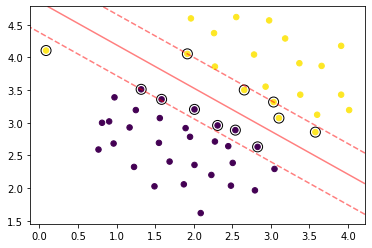

In [59]:
visualiseBoundary(clf,X,y)

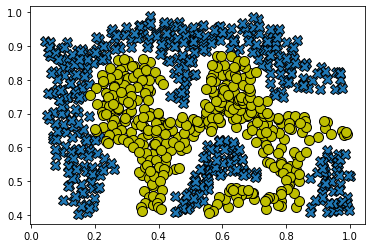

In [60]:
data = loadmat(os.path.join('Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]
plotData(X, y)

In [61]:
#C is large, overfit. C is small, fits perfectly
clf = svm.SVC(kernel = "rbf",C = 10)

# fitting x samples and y classes 
clf.fit(X, y) 

SVC(C=10)

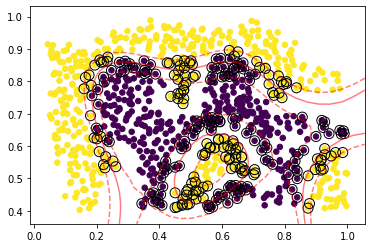

In [62]:
visualiseBoundary(clf,X,y)

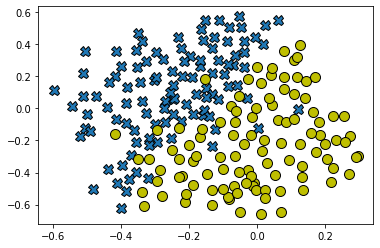

In [63]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data3.mat'))
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
plotData(X, y)

In [64]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    """
   
    C_list = [0.01,0.03,0.1,0.3,1,3,10,30]
    sigma_list = [0.01,0.03,0.1,0.3,1,3,10,30]
    maxacc = 0
    for i in range(len(C_list)):
        for j in range(len(sigma_list)):
            C = C_list[i]
            sigma = sigma_list[j]
            clf = svm.SVC(kernel = 'rbf',C = C,gamma = sigma)
            clf.fit(X,y)
            ypredict = clf.predict(Xval)
            count = sum(ypredict==yval)/yval.size
            if count>maxacc:
                maxacc = count
                Csig = [C,sigma]
           
    return Csig

In [65]:
[C,sigma] = dataset3Params(X,y,Xval,yval)

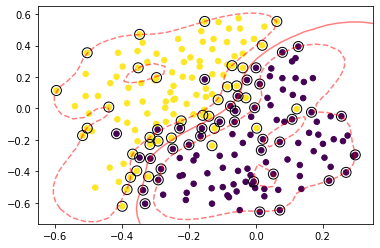

Accuracy on development set =  96.5


In [66]:
clf = svm.SVC(kernel = 'rbf',C = C,gamma = sigma)
clf.fit(X,y)
visualiseBoundary(clf,X,y)
ypredict = clf.predict(Xval)
print("Accuracy on development set = ",sum(ypredict==yval)/yval.size * 100)